<a href="https://colab.research.google.com/github/sushmitasardar/Tesla-code-supervised-ML-project/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project(Individual_collab).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# importing library
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

import datetime as dt
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")


In [3]:
# drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# importing the dataset
df_original = pd.read_csv('/content/drive/MyDrive/capstone project ML.1/Copy of SeoulBikeData.csv', encoding= 'unicode_escape')



In [5]:
# dataframe
df= df_original.copy()

In [6]:
# checking the number of rows and columns
df.shape

(8760, 14)

In [7]:
# checking the rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
# Looking for the data tpye non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
#Describing the data
df.describe(include='all').transpose()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [10]:
#checking for Null Values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
# checking unique values 
df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [12]:
# checking for the duplicate rows
df.duplicated().value_counts() 

False    8760
dtype: int64

# **Data Cleaning**
## Before doing the EDA we need to clean our data by removing all the null and NaN  values so that we can get correct outcome after doing EDA.

## While cleaning the data we will follow fews steps:-


## *   Removing the null and NaN values.




In [13]:
# Renaming columns for convinence (Camel_Case)
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity',
                      'Wind speed (m/s)':'Wind_speed','Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                      'Solar Radiation (MJ/m2)':'Solar_Radiation','Rainfall(mm)':'Rainfall',
                      'Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'})

In [14]:
df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [15]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
# Droping unnecessary columns.
# Year basically contains details from 2017 december to 2018 november so we considers this is one year.
df=df.drop(columns=['Date','day_of_week'],axis=1)

In [16]:
# check the Newly Created columns
df.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [17]:
#Get distinct categories counts for weekdays_weekends categories
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [18]:
#Get distinct categories counts for Seasons categories
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [19]:
#Get distinct categories counts for Holiday categories
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

# **EXPLORATARY DATA ANALYSIS**
## EDA is applied to investigate the data and summarize the key insights. It will give us the basic understanding of our data, it's distribution, null values and much more. We can either explore data using graphs or through some python functions

Text(0.5, 1.0, 'Co-relation of the columns')

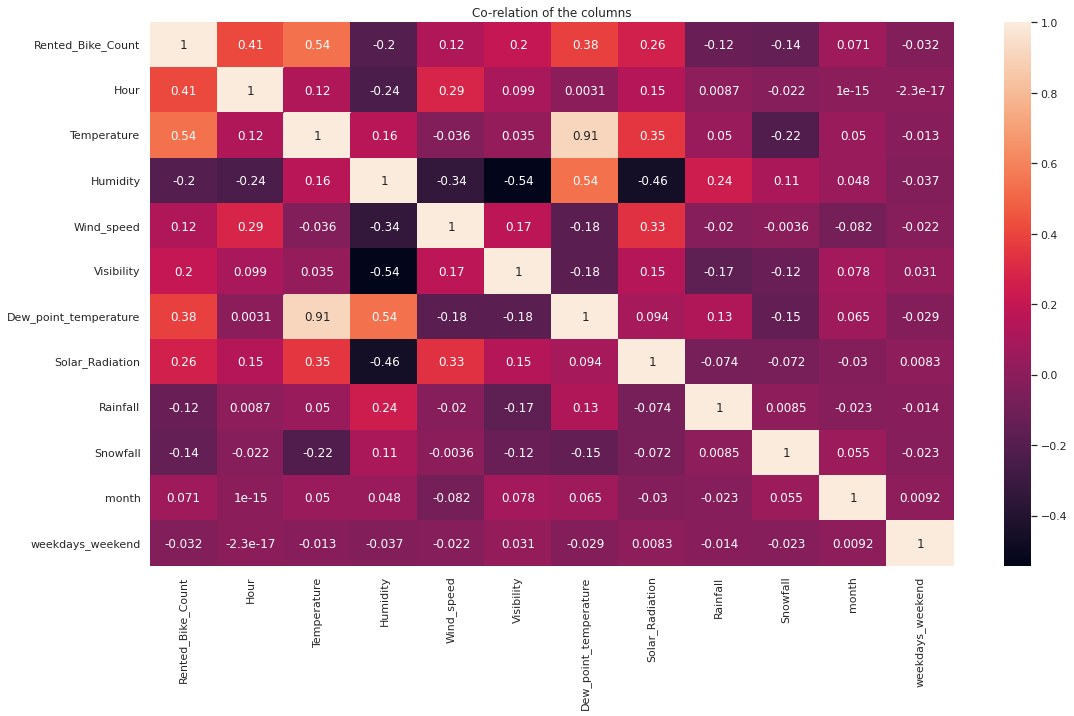

In [20]:
# Showing the correlation of the columns in graph
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.title('Co-relation of the columns')

# **Obeservations**:

*   Humidity has low correlation with visibility due to solar radiation.
*   Dew point temperature and temperature are highly related.




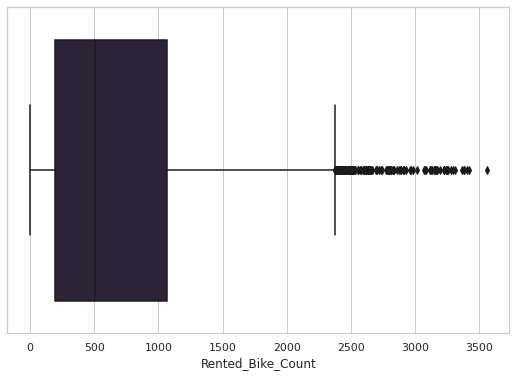

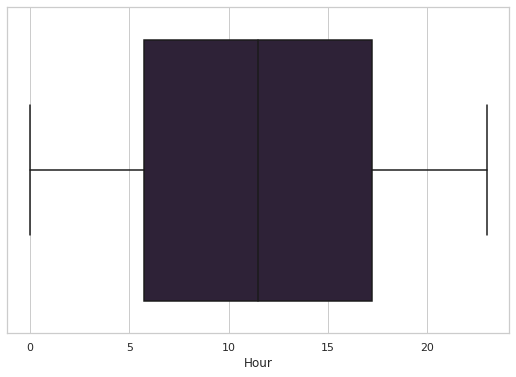

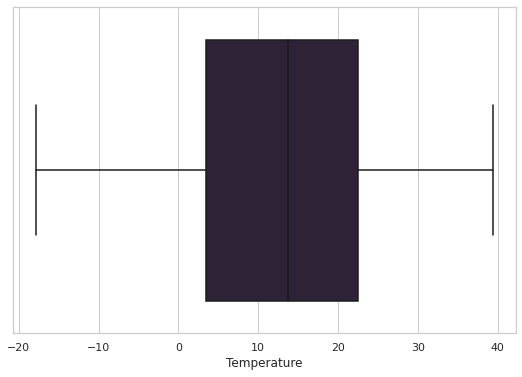

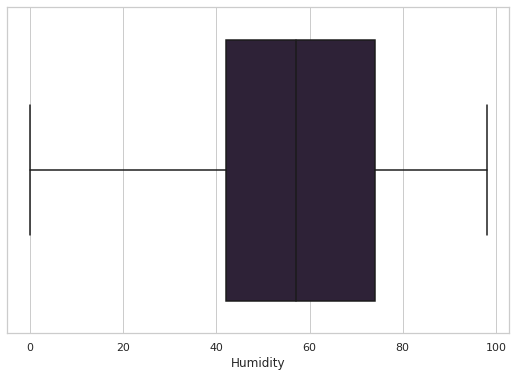

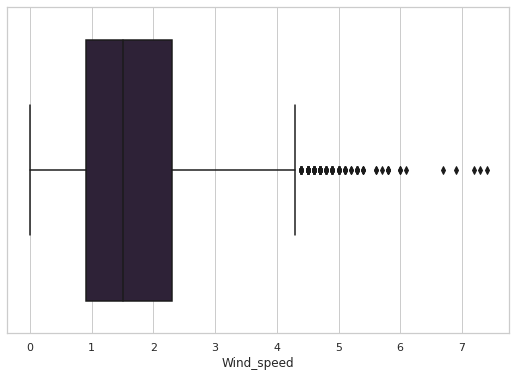

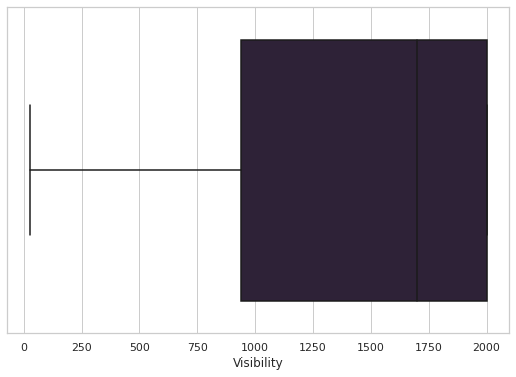

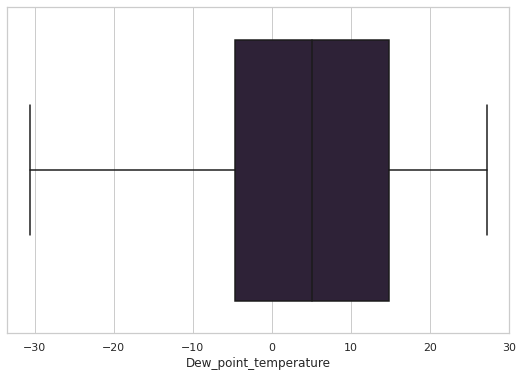

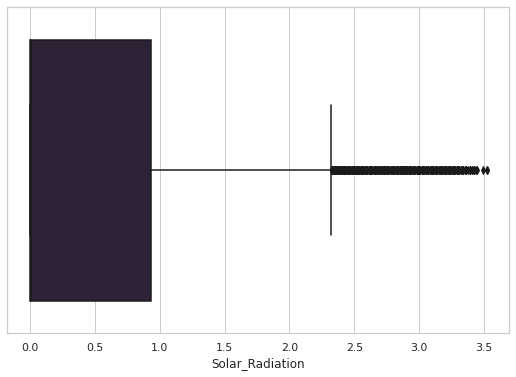

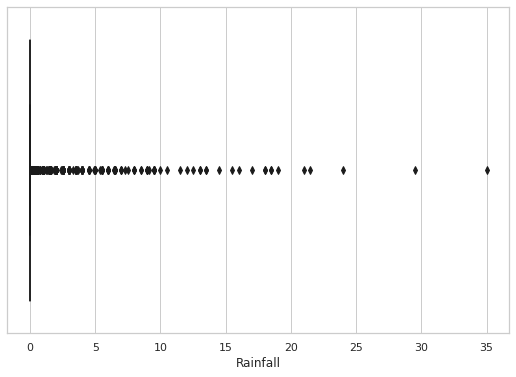

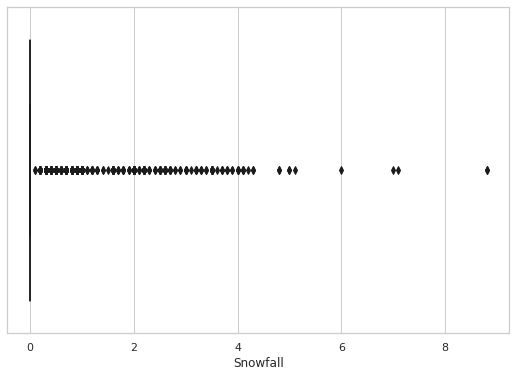

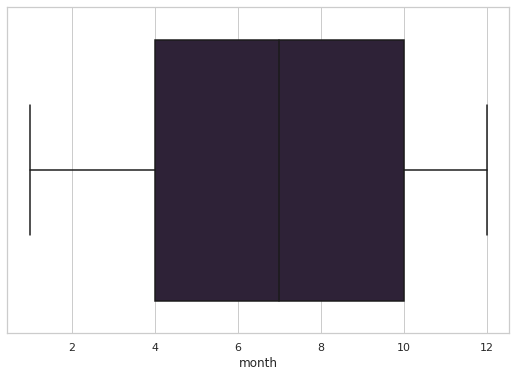

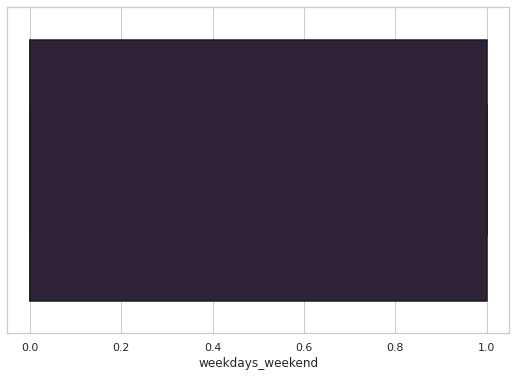

In [21]:
# create numeric columns list.
numeric_col=df.describe().columns.tolist()
numeric_col

# create categorical column list
categorical_columns= list(set(df.columns) - set(df.describe().columns))
categorical_columns

# priting box plot of numeric columns to check oultliers
for col in numeric_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(x=df[col])

[Text(0.5, 1.0, 'Count of Rented bikes based on Seasons ')]

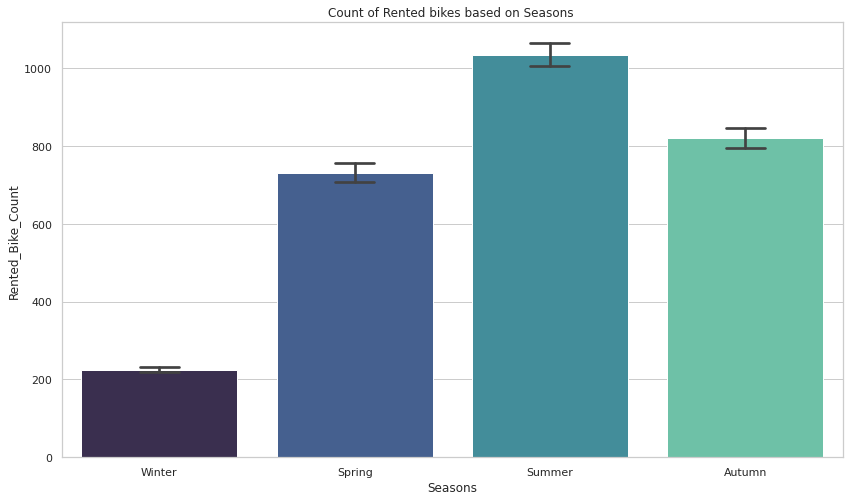

In [22]:
#analysis of data by vizualisation using seasons and rented bike count.
fig,ax=plt.subplots(figsize=(14,8))
sns.barplot(data=df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Seasons ')

# **Obeservations:**


*   Maximum number of bike rentals in Summer season, while in winter season the bike rentend bike count is low.
*   This signifies that people enjoy bike riding in pleasant weather.







[Text(0.5, 1.0, 'Count of Rented bikes based on Month ')]

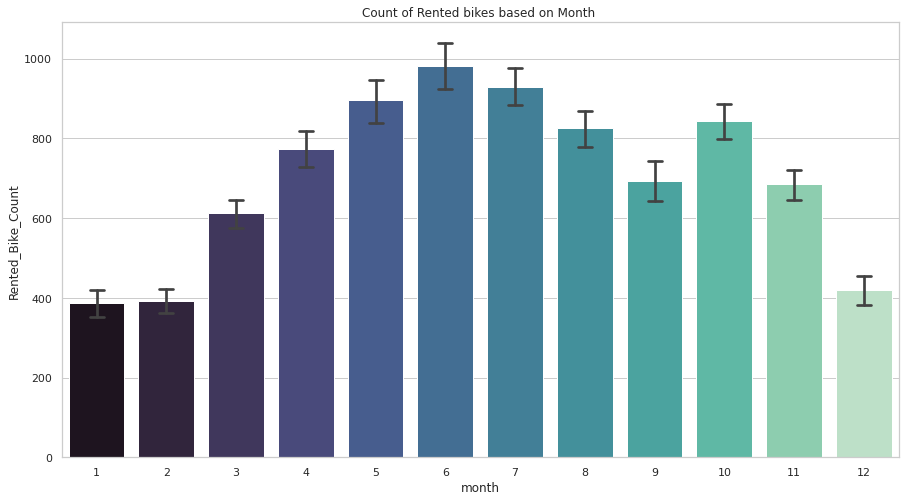

In [23]:
#analysis of data by vizualisation using month and rented bike count.
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2,palette = "mako")
ax.set(title='Count of Rented bikes based on Month ')
     


# **Observation:**



*   The demand of the rented bike is high between 5 to 10 months as compare to

other months.





Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

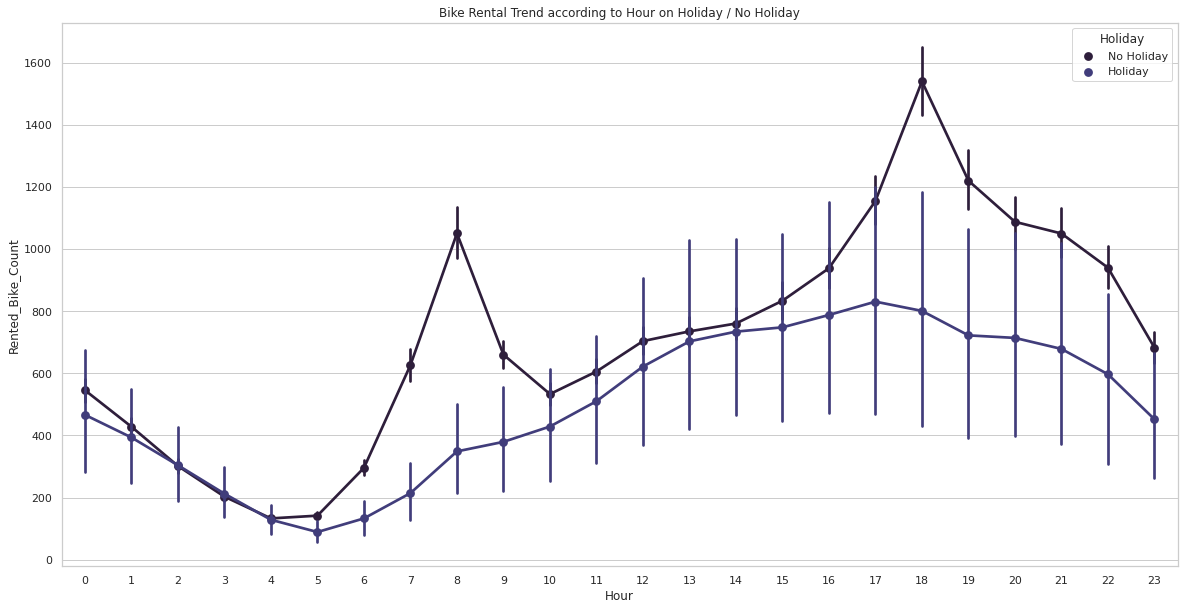

In [24]:
#anlysis of data by vizualisation using hour and rented bike count with respect to holiday and no holiday.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['Holiday'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")


# **Observation:**



* There is sudden peak between 6/7AM to 10 AM. Office and College going time could be the reason for this sudden peak.( NO Holiday). But on Holiday the case is different less bike rentals happend.
*   Again there is peak between 5 pm to 8 PM. may be its office leaving time for the above people.( NO Holiday).



Text(0.5, 1.0, 'Bike Rental Trend according to Hour in Weekdays_or_weekend.')

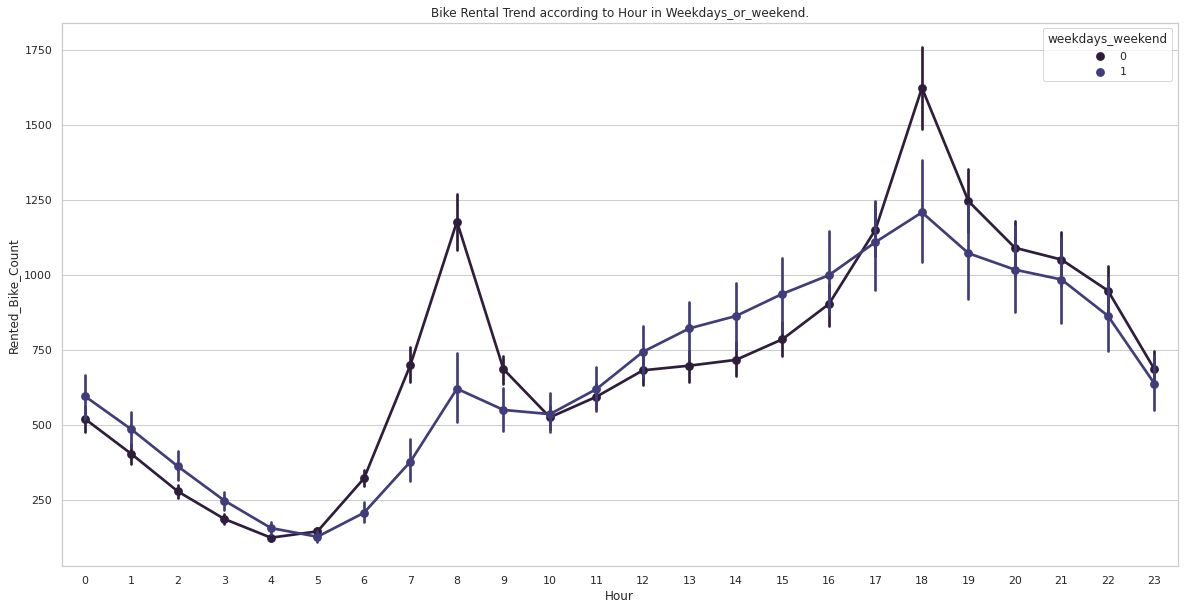

In [25]:
#anlysis of data by vizualisation using weekdays-weekend and rented bike count with respect to hour.
plt.figure(figsize=(20,10))
sns.pointplot(x=df['Hour'],y=df['Rented_Bike_Count'],hue=df['weekdays_weekend'])
plt.title("Bike Rental Trend according to Hour in Weekdays_or_weekend.")
# 0= weekdays
#1= weekend

# **Observation:**


*   In the week days the demand of the bike is higher because of the office as compare to the weekend.




# **Visualizing the distribution**:

## Checking the distribution of independent variables

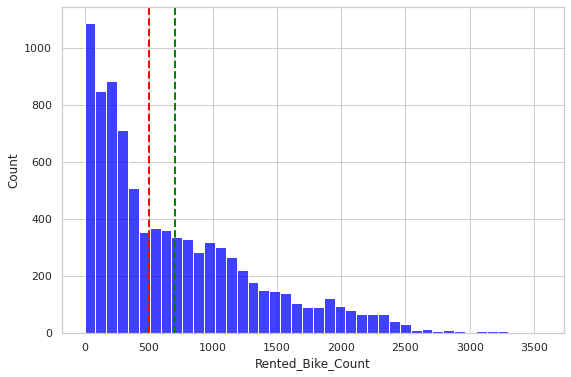

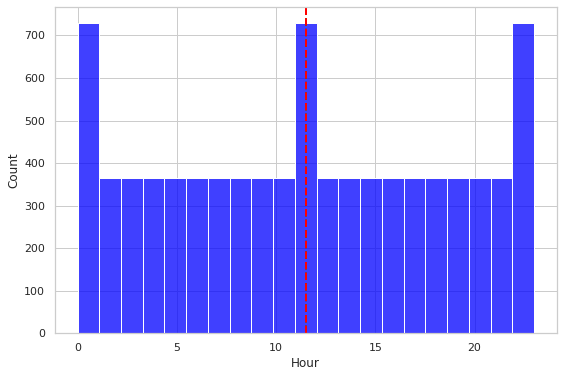

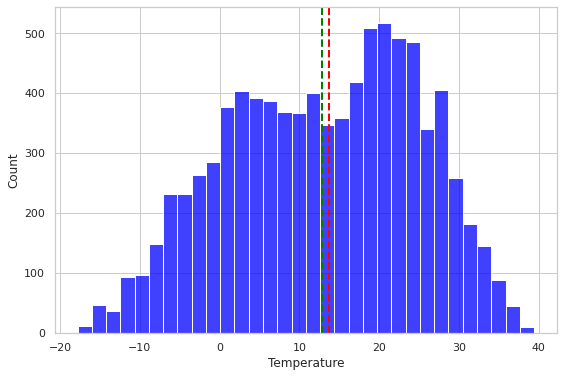

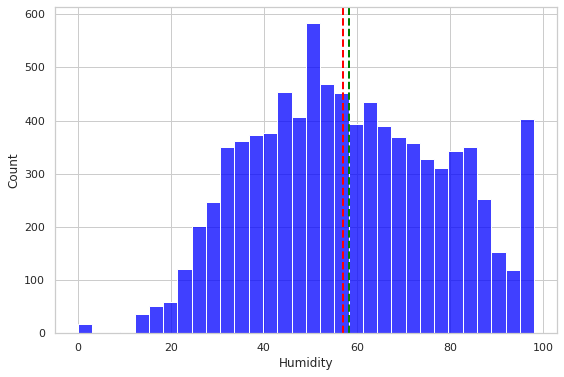

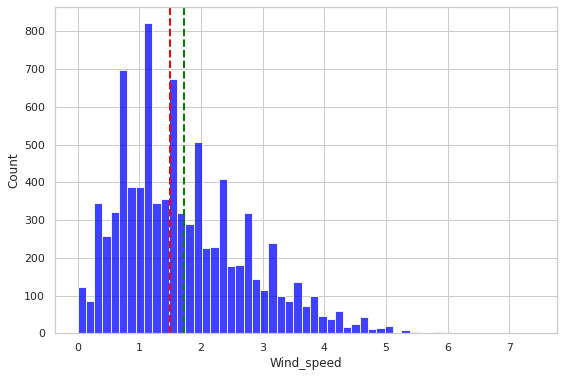

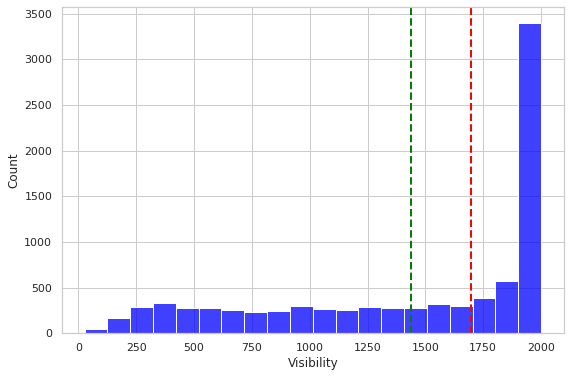

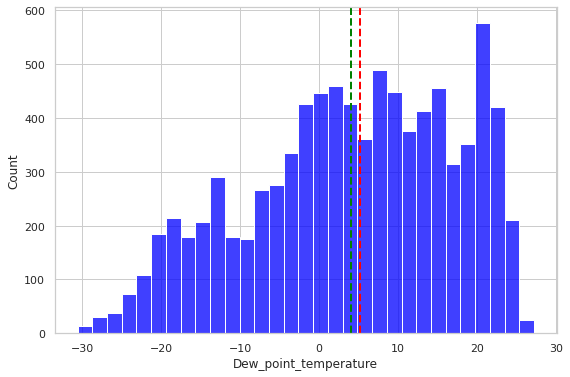

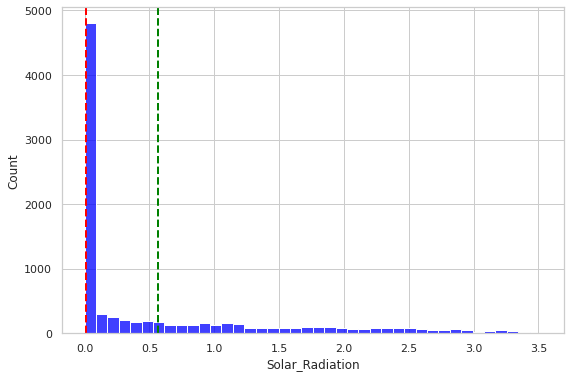

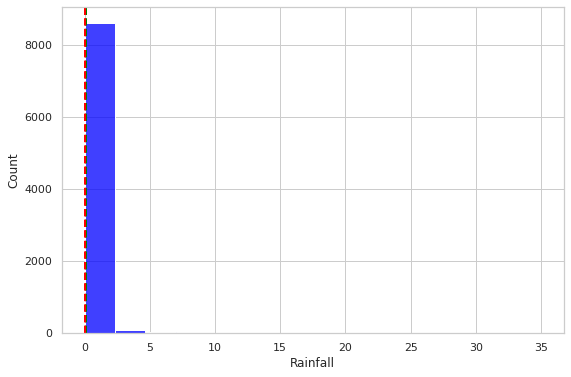

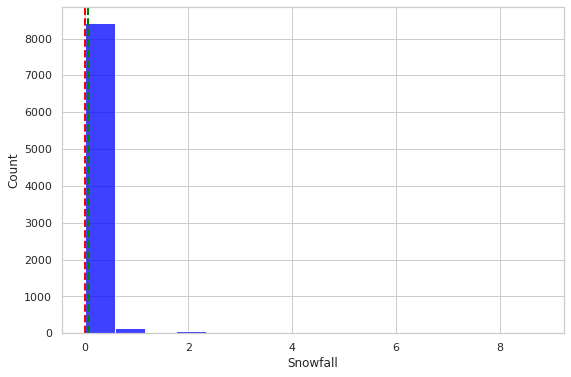

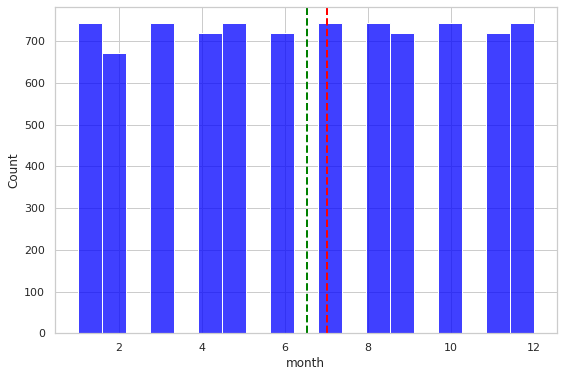

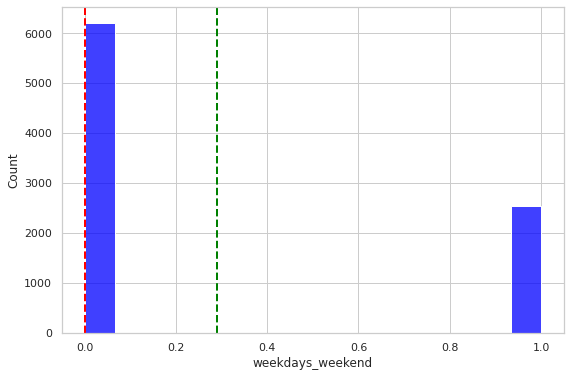

In [26]:
# Plot  a histogram graph to check where mean and medians are lying in the distribution and the data points in variables are distributed.
for col in  numeric_col[:]:
  fig = plt.figure(figsize=(9, 6))
  sns.histplot(df[col],color= 'blue')
  plt.axvline(df[col].mean(), color='g', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.show()


# **Observation:**


*   The features which are skewed, their mean and the median are also skewed.



# **Normalising Rented_Bike_Count Column Data.**

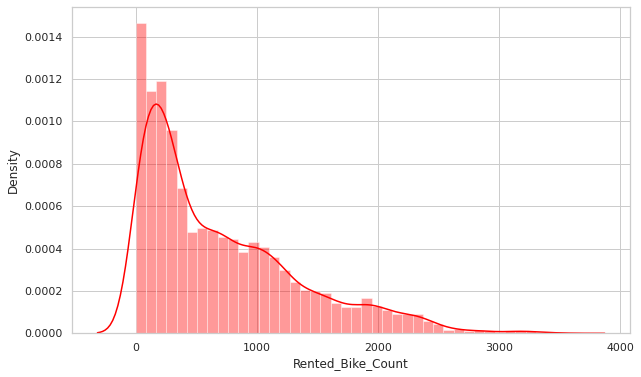

In [27]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
sns.distplot(df['Rented_Bike_Count'],color='red')

# **Observation:**


*   Rented Bike Count has moderate skewness toward right. And, we already know that the assumption of linear regression tells us that the distribution of dependent variable has to be normal, hence we should perform some operation to make it normal.



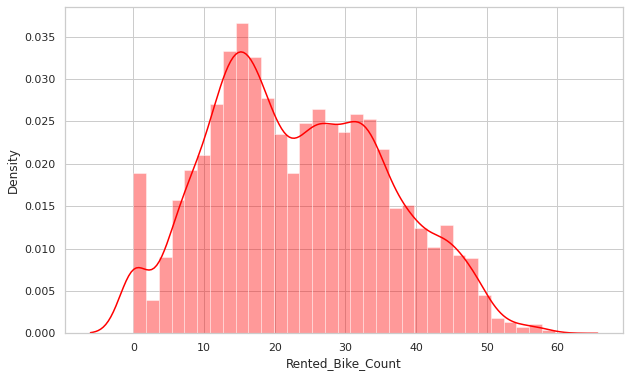

In [28]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
sns.distplot(np.sqrt(df['Rented_Bike_Count']), color='red')


# **Observation:**


*   After applying the Square Rooting the skewed Rented Bike Count, we almost got the normal distribution.



# **Regression Plotting Of Features**:

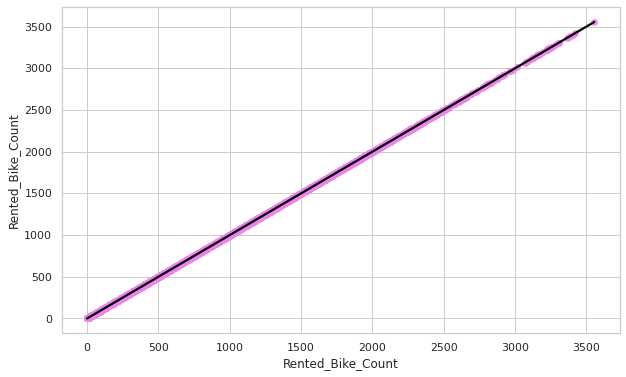

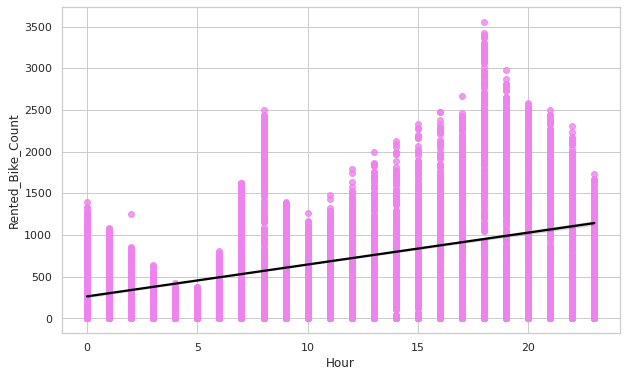

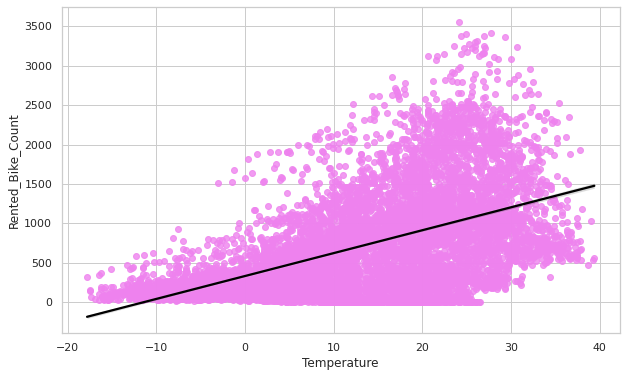

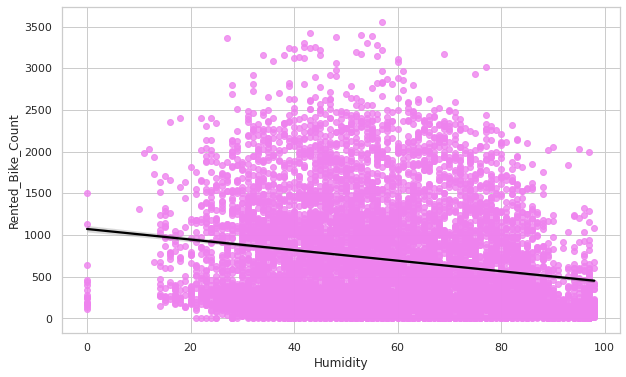

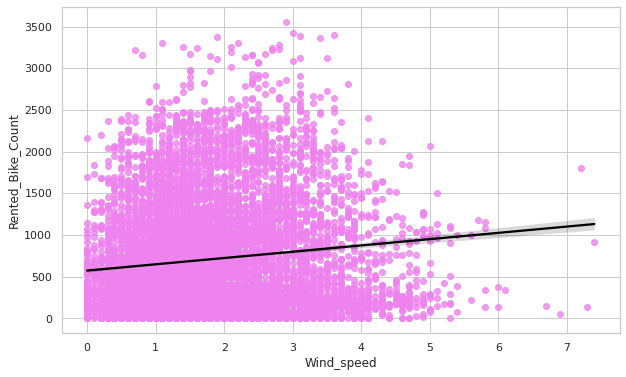

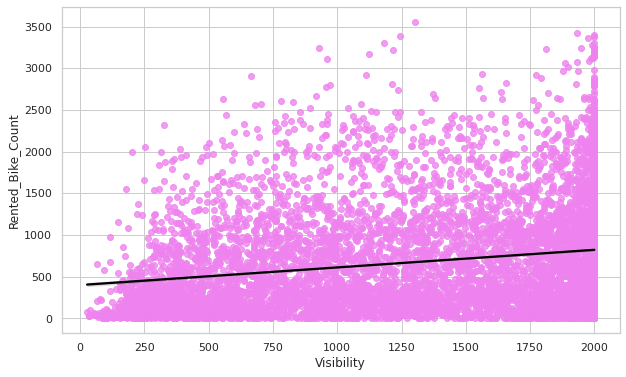

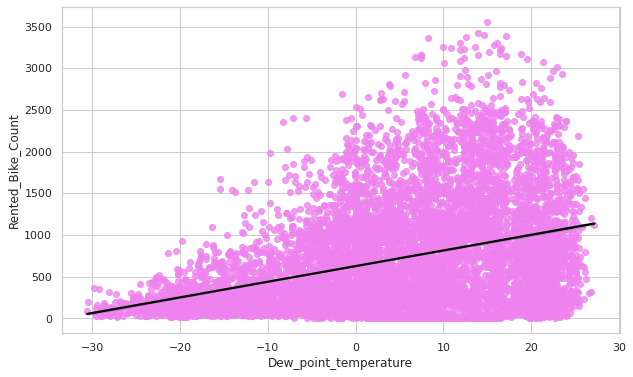

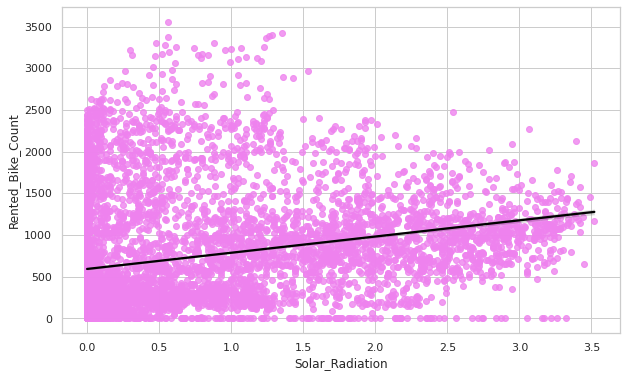

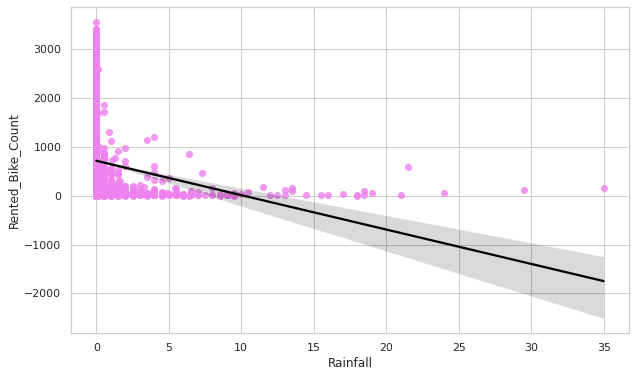

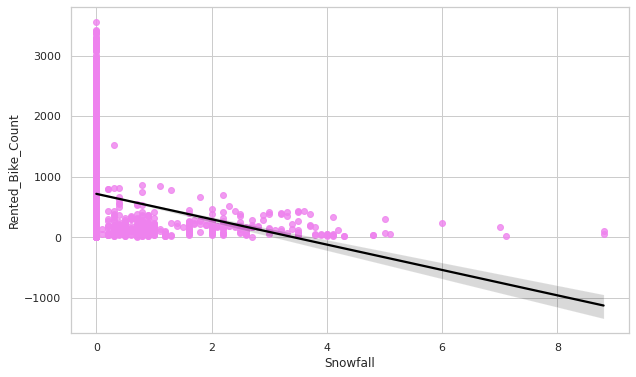

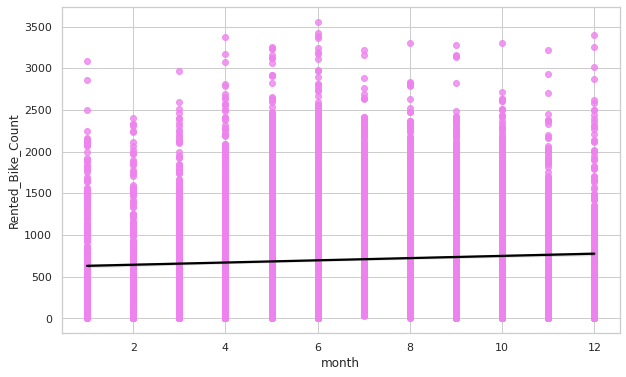

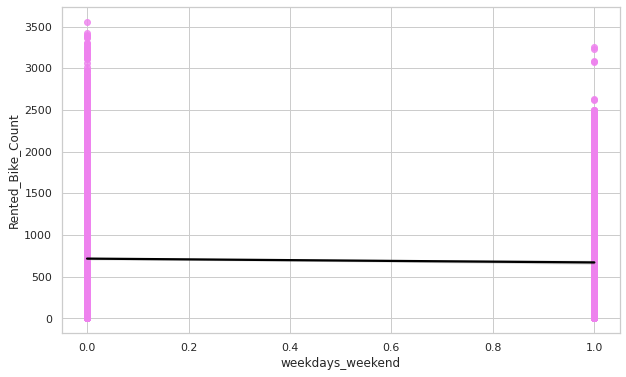

In [29]:
#plotting the regression plot for all the numerical features
for col in  numeric_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented_Bike_Count'],scatter_kws={"color": 'violet'}, line_kws={"color": "black"})

# **Observation:**



*   The columns 'Hour','Temperature', 'Wind_speed','Visibility', and 'Solar_Radiation' are positively related to the dependent variable. Which means that the rented bike count increases with increase of these features.
*   Whereas, the colums 'Rainfall','Snowfall','Humidity' are those features which are negatively related with the dependent variable, which implies that the rented bike count decreases when these features increases.



# **Modeling:**

## **Prepare data for modeling:**

In [30]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [31]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [32]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count']]])

,variables,VIF
0,Hour,4.424147
1,Temperature,34.331857
2,Humidity,6.973710
3,Wind_speed,4.835871
4,Visibility,9.309721
5,Dew_point_temperature,17.758961
6,Solar_Radiation,2.881777
7,Rainfall,1.082987
8,Snowfall,1.125842
9,month,4.690212


# **Observation:**

humidity vif is greater than 5 so we will remove that column.

In [33]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

,variables,VIF
0,Hour,4.261971
1,Temperature,32.943543
2,Wind_speed,4.359571
3,Visibility,8.411644
4,Dew_point_temperature,15.570048
5,Solar_Radiation,2.791031
6,Rainfall,1.056313
7,Snowfall,1.090246
8,month,3.741733
9,weekdays_weekend,1.379568


In [34]:
# checking categoiries in season column.
df['Seasons'].value_counts()
     

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [35]:
# Createing dummy variables
df=pd.get_dummies(df,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [36]:
# checking categoiries in holiday columns.
df['Holiday'].value_counts()
     

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [37]:
# # Labeling for Yes=1 and no No=0
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1, 'No':0})

In [38]:
# Labeling for holiday=1 and no holiday=0
df['Holiday']=df['Holiday'].map({'No Holiday':0, 'Holiday':1})
     

In [39]:
# checking dummy and labled columns
df.head(3)


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Holiday,Functioning_Day,month,weekdays_weekend,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,0,0,0,1


In [40]:
# final info before going for modeling
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Holiday                8760 non-null   int64  
 11  Functioning_Day        8760 non-null   int64  
 12  month                  8760 non-null   int64  
 13  weekdays_weekend       8760 non-null   int64  
 14  Seasons_Spring         8760 non-null   uint8  
 15  Seas

# **Linear Regression:**

In [41]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [42]:
# Define X-variable(Independent Variables) and Y-Variable(Dependent Variable)
X=df.drop('Rented_Bike_Count',axis=1)
y=np.sqrt(df['Rented_Bike_Count'])
     

In [43]:
# Split data into train test.
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size = 0.3, random_state = 0)
print(X_train.shape)
X_test.shape

(6132, 16)


(2628, 16)

In [44]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# for its a good practice to apply scaling to the linear regression models.
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [45]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6132, 16)
(6132,)
(2628, 16)
(2628,)


In [46]:
# Taking instance
l_reg=LinearRegression()
# fitting the model and trainig
l_reg.fit(X_train,y_train)

LinearRegression()

In [47]:
#Checking score
l_reg.score(X_train,y_train)

0.6572347362122613

In [48]:
# Y predictions on train data
y_pred_train=l_reg.predict(X_train)

# y predictions on test data
y_pred=l_reg.predict(X_test)

In [49]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")
     

The Mean Absolute Error (MAE) is 5.581112829917447.
The Mean Squred Error(MSE) is 53.31799650541905.
The Root Mean Squared Error(RMSE) is 7.30191731707632.
The R2 Score is 0.6572347362122613.


## **Saving train data set results in dataframe:**

In [50]:
#Saving train data set results in dataframe.
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# create training_result dataframe
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,5.5811,53.318,7.3019,0.6572


## **Evaluation of Test data set:**

In [51]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.642082808925776.
 The Mean Squred Error(MSE) is 54.073835268920426.
The Root Mean Squared Error(RMSE) is 7.353491365937709.
The R2 Score is 0.647952414386352.


In [52]:
# saving test result in dictionary.
test_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# create test_result dataframe
test_results_df=pd.DataFrame(test_dict,index=[1])
test_results_df
     

,Model,MAE,MSE,RMSE,R2_score
1,Linear Regression,5.6421,54.0738,7.3535,0.648


# **Observation:**

*   On testing data R2 score is 0.6183 which is almost close to training data R2 score.Hence we can say that our model performance is good and overfitting is not observed.



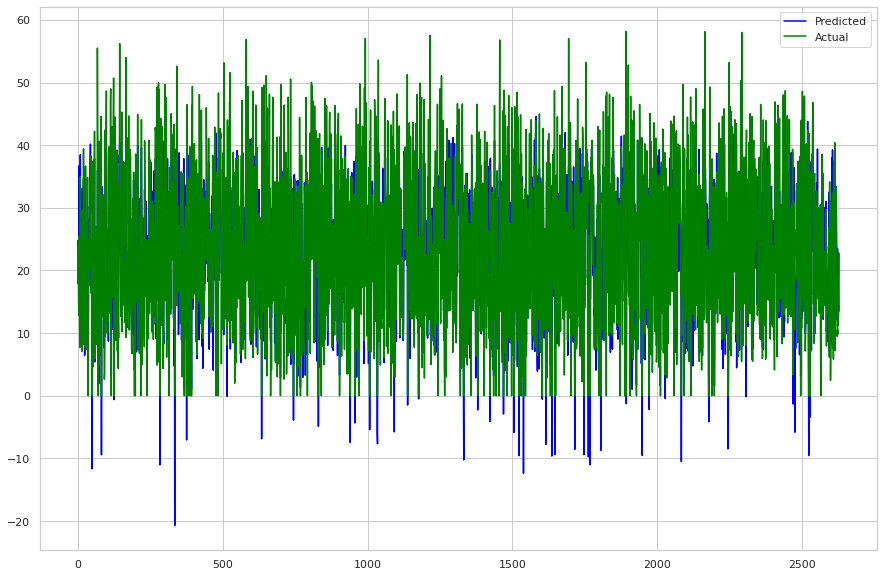

In [53]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred, color='blue')
plt.plot(np.array(y_test), color='green')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'y_predicted')

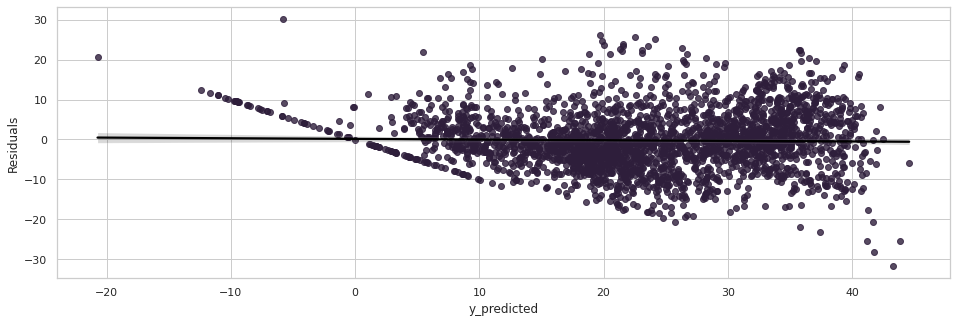

In [54]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

# **Implementing Lasso regression (L1 Regularization)**:

In [55]:
# instantiating
lasso_reg=Lasso(alpha=0.01)
# Fitting and training the model
lasso_reg.fit(X_train,y_train)
# Check coefficient
lasso_reg.coef_

array([ 11.2787602 ,   5.58168546, -25.55531844,   0.        ,
         0.44769131,  22.73825135,  -1.94437358, -41.68376613,
         0.        ,  -2.94435474,  28.01968376,   0.98784864,
        -0.64978307,  -2.14584127,  -2.63409284,  -7.5007528 ])

In [56]:
# Check score on train dataset
lasso_reg.score(X_train,y_train)

0.6559702145313346

In [57]:
# Check score on test dataset
lasso_reg.score(X_test,y_test)

0.6488719052429812

In [58]:
# Check intercept
lasso_reg.intercept_

-7.723950167840975

In [59]:
# y prdiction on train data
y_pred_train=lasso_reg.predict(X_train)
# y prdiction on test data
y_pred=lasso_reg.predict(X_test)
     

## **Evaluation On Train Data:**

In [60]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.605016181648011.
The Mean Squred Error(MSE) is 53.51469602455824.
The Root Mean Squared Error(RMSE) is 7.315373949741615.
The R2 Score is 0.6559702145313346.


In [61]:
# Create train results dictionary
train_dict={'Model':"Lasoo",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
# appending train result to training result dataframe
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.5811,53.3180,7.3019,0.6572
1,Lasoo,5.6050,53.5147,7.3154,0.6560


## **Evaluation On Test Data:**

In [62]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.661041974246683.
 The Mean Squred Error(MSE) is 53.9326032334103.
The Root Mean Squared Error(RMSE) is 7.343882027470913.
The R2 Score is 0.6488719052429812.


In [63]:
# Create test results dictionary
test_dict={'Model':"Lasso",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}

# appending test result to test result dataframe
test_results_df=test_results_df.append(test_dict,ignore_index=True)


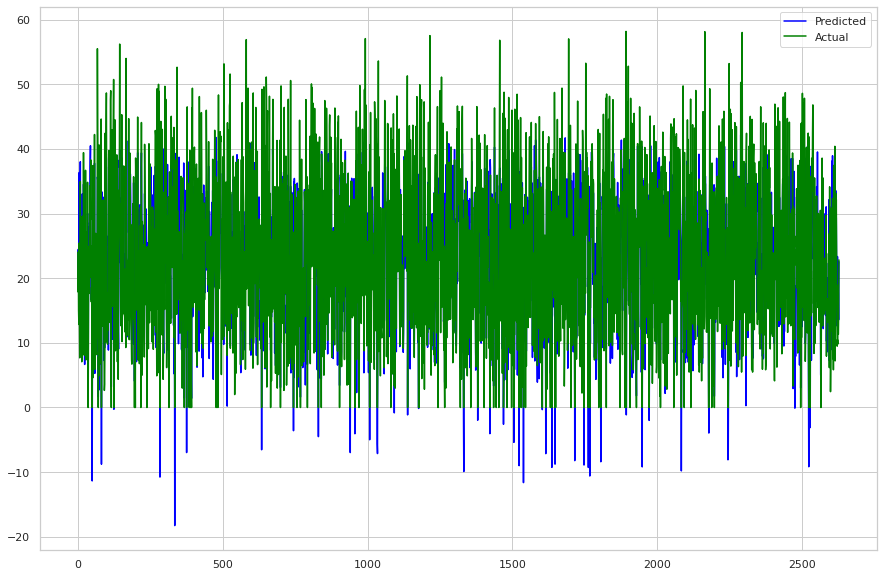

In [64]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred, color='blue')
plt.plot(np.array(y_test), color='green')
plt.legend(["Predicted","Actual"])
plt.show()


Text(0.5, 0, 'y_predicted')

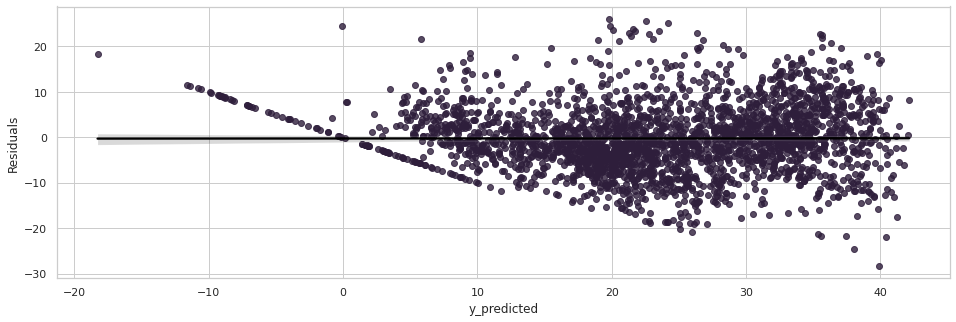

In [65]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

# **Implementing Elastic Net Regression:**

In [66]:
# creating object of elastic net
elastic_net_reg=ElasticNet(alpha=0.001,l1_ratio=0.5)
elastic_net_reg.fit(X_train,y_train)


ElasticNet(alpha=0.001)

In [67]:
# Check score on train data
elastic_net_reg.score(X_train,y_train)


0.6543913027333681

In [68]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.6478177409990513

In [69]:
# predicting Y train values from train data set
y_pred_train=elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred=elastic_net_reg.predict(X_test)

In [70]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 5.622117798856725.
The Mean Squred Error(MSE) is 53.76029971495576.
The Root Mean Squared Error(RMSE) is 7.332141550390019.
The R2 Score is 0.6543913027333681.


In [71]:

train_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df
     

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.5811,53.3180,7.3019,0.6572
1,Lasoo,5.6050,53.5147,7.3154,0.6560
2,ElasticNet(GridSearchCV-Tunned),5.6221,53.7603,7.3321,0.6544


In [72]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 5.674647064459242.
 The Mean Squred Error(MSE) is 54.094520843421144.
The Root Mean Squared Error(RMSE) is 7.354897745272951.
The R2 Score is 0.6478177409990513.


In [73]:
test_dict={'Model':"ElasticNet(GridSearchCV-Tunned)",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
test_results_df=test_results_df.append(test_dict,ignore_index=True)


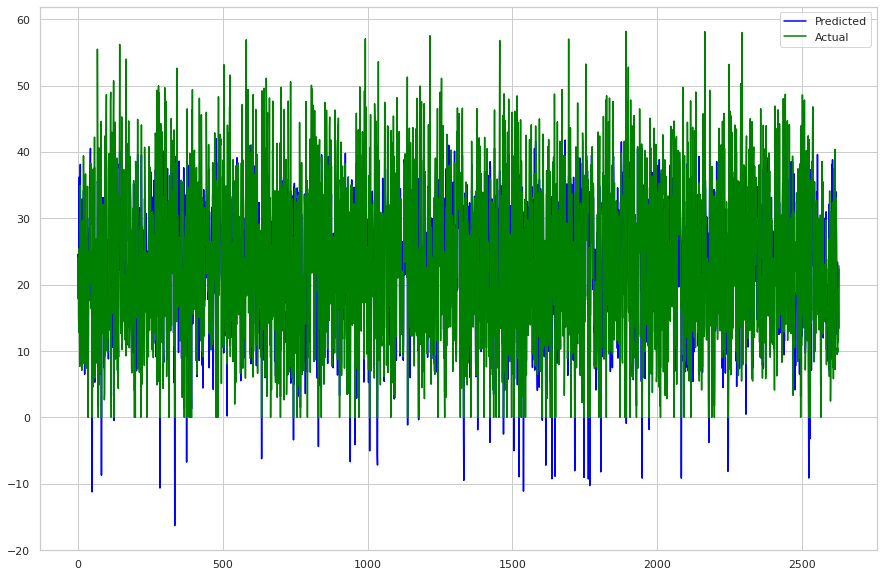

In [74]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred), color='blue')
plt.plot(np.array(y_test), color='green')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'y_predicted')

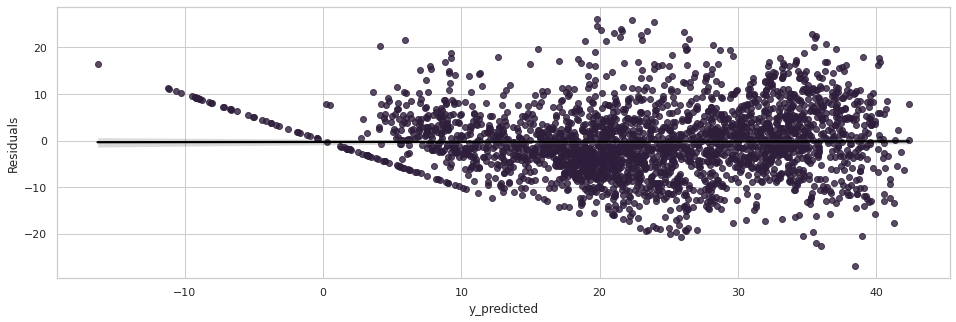

In [75]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

# **Implementing Decision Tree Regression:**

In [76]:
#import decsion tree packages
from sklearn.tree import DecisionTreeRegressor

# create an object
D_tree=DecisionTreeRegressor(max_depth=9,splitter='best',max_features='auto')

# fitting Xtrain yTrain
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

In [77]:
# Check score on Train dataset
D_tree.score(X_train,y_train)

0.8983894255281223

In [78]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.8418620788185139

In [79]:
#  predicting y_train_predictions from  X train values
y_pred_train=D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred=D_tree.predict(X_test)

In [80]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.732473286417714.
The Mean Squred Error(MSE) is 15.805779718566091.
The Root Mean Squared Error(RMSE) is 3.975648339399008.
The R2 Score is 0.8983894255281223.


In [81]:
# creating dictionary  of Decison tree results( Train dataset)
train_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.5811,53.3180,7.3019,0.6572
1,Lasoo,5.6050,53.5147,7.3154,0.6560
2,ElasticNet(GridSearchCV-Tunned),5.6221,53.7603,7.3321,0.6544
3,Decision Tree Regression,2.7325,15.8058,3.9756,0.8984


In [82]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.364637872703807.
 The Mean Squred Error(MSE) is 24.289681989529587.
The Root Mean Squared Error(RMSE) is 4.928456349561147.
The R2 Score is 0.8418620788185139.


In [83]:
test_dict={'Model':"Decision Tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}
test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.6421,54.0738,7.3535,0.6480
1,Lasso,5.6610,53.9326,7.3439,0.6489
2,ElasticNet(GridSearchCV-Tunned),5.6746,54.0945,7.3549,0.6478
3,Decision Tree Regression,3.3646,24.2897,4.9285,0.8419


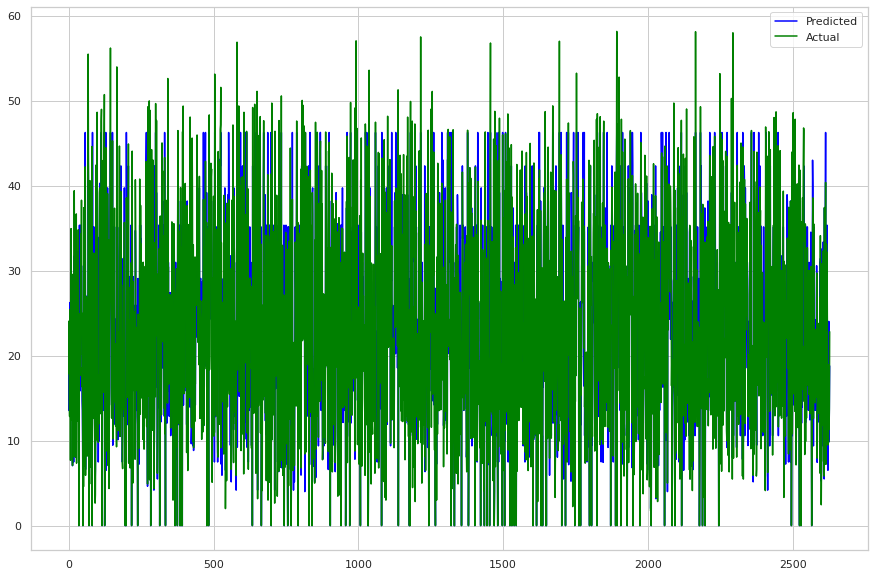

In [84]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred, color='blue')
plt.plot(np.array(y_test), color='green')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'y_predicted')

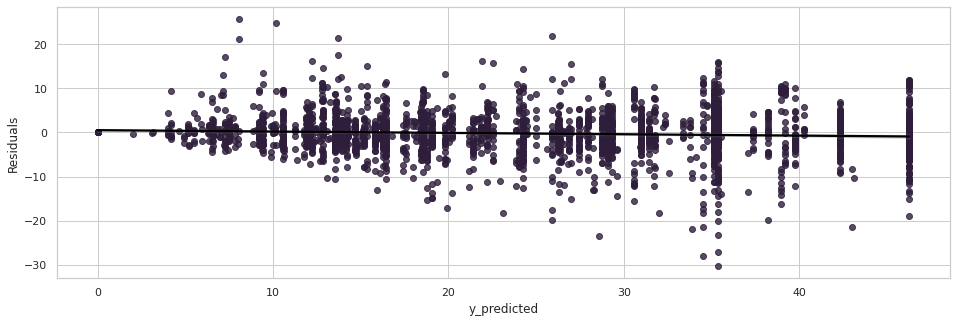

In [85]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

# **Hyperparameter Tuning:**

In [86]:

# Hyper parameters range intialization for tuning 
tree=DecisionTreeRegressor()
parameters={'criterion': ["mae"],
            "splitter":["best","random"],
            "max_depth" : [3,5,7,9,None],
           "max_features":["auto","log2"] }




In [87]:
D_tree=DecisionTreeRegressor(max_depth=9,max_features='auto',splitter='best')
D_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=9, max_features='auto')

Text(0.5, 0, 'Relative Importance')

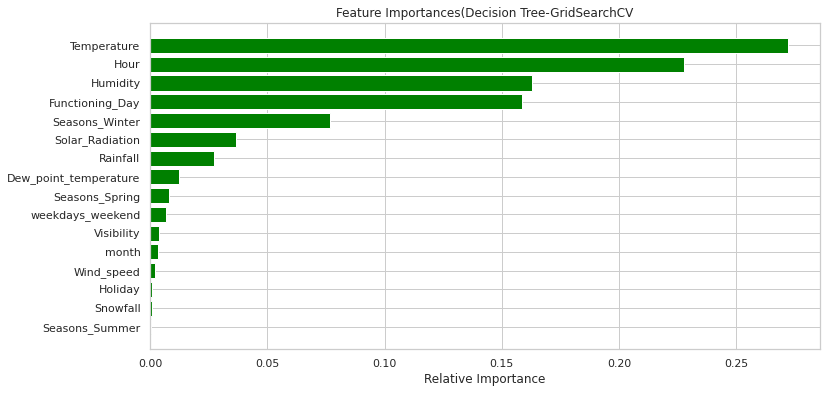

In [88]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

# **Observation:**


*   We have applied this best parametrs to above Decsion tree regressor model




# **Implementng Random Forest Regression:**


In [89]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [90]:
rf.score(X_train,y_train)

0.9881177049187384

In [91]:
rf.score(X_test,y_test)

0.915775642480025

In [92]:
y_pred_train=rf.predict(X_train)
y_pred=rf.predict(X_test)
     

In [93]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 0.8870556725120604.
The Mean Squred Error(MSE) is 1.8483208030420164.
The Root Mean Squared Error(RMSE) is 1.3595296256580864.
The R2 Score is 0.9881177049187384.


In [94]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.5811,53.3180,7.3019,0.6572
1,Lasoo,5.6050,53.5147,7.3154,0.6560
2,ElasticNet(GridSearchCV-Tunned),5.6221,53.7603,7.3321,0.6544
3,Decision Tree Regression,2.7325,15.8058,3.9756,0.8984
4,Random Forest,0.8871,1.8483,1.3595,0.9881


In [95]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 2.4164596358316297.
 The Mean Squred Error(MSE) is 12.936700094753405.
The Root Mean Squared Error(RMSE) is 3.596762446249878.
The R2 Score is 0.915775642480025.


In [96]:
test_dict={'Model':"Radom forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.6421,54.0738,7.3535,0.6480
1,Lasso,5.6610,53.9326,7.3439,0.6489
2,ElasticNet(GridSearchCV-Tunned),5.6746,54.0945,7.3549,0.6478
3,Decision Tree Regression,3.3646,24.2897,4.9285,0.8419
4,Radom forest,2.4165,12.9367,3.5968,0.9158


Text(0.5, 0, 'Relative Importance')

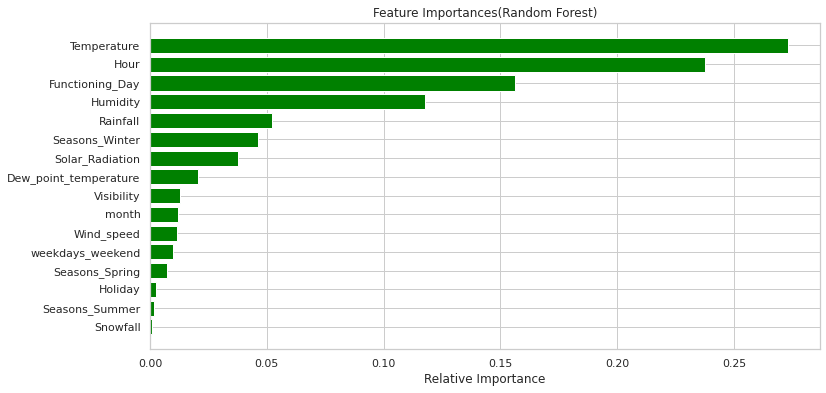

In [97]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

# **Observation:**

*   By looking at the graph we can say that temperature and hours plays very important role on bike rentals.




# **Implementing Gradient Boosting Regressor:**

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg=GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

GradientBoostingRegressor()

In [99]:
gradboo_reg.score(X_train,y_train)

0.8914101737400404

In [100]:
gradboo_reg.score(X_test,y_test)

0.8729743713540684

In [101]:
y_pred_train=gradboo_reg.predict(X_train)
y_pred=gradboo_reg.predict(X_test)

In [102]:
# Evaluation of training data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_train,y_pred_train)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_train,y_pred_train)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_train,y_pred_train)
print(f"The R2 Score is {R2}.")

The Mean Absolute Error (MAE) is 2.9528838063418217.
The Mean Squred Error(MSE) is 16.89141983954938.
The Root Mean Squared Error(RMSE) is 4.109917254586688.
The R2 Score is 0.8914101737400404.


In [103]:
train_dict={'Model':"Gardient boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}




traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.5811,53.3180,7.3019,0.6572
1,Lasoo,5.6050,53.5147,7.3154,0.6560
2,ElasticNet(GridSearchCV-Tunned),5.6221,53.7603,7.3321,0.6544
3,Decision Tree Regression,2.7325,15.8058,3.9756,0.8984
4,Random Forest,0.8871,1.8483,1.3595,0.9881
5,Gardient boosting Regression,2.9529,16.8914,4.1099,0.8914


In [104]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

 The Mean Absolute Error (MAE) is 3.1681398301811488.
 The Mean Squred Error(MSE) is 19.51089341049831.
The Root Mean Squared Error(RMSE) is 4.417113696804544.
The R2 Score is 0.8729743713540684.


In [105]:
test_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2_score':round(R2,4)}


test_results_df=test_results_df.append(test_dict,ignore_index=True)
test_results_df
     

,Model,MAE,MSE,RMSE,R2_score
0,Linear Regression,5.6421,54.0738,7.3535,0.6480
1,Lasso,5.6610,53.9326,7.3439,0.6489
2,ElasticNet(GridSearchCV-Tunned),5.6746,54.0945,7.3549,0.6478
3,Decision Tree Regression,3.3646,24.2897,4.9285,0.8419
4,Radom forest,2.4165,12.9367,3.5968,0.9158
5,Gradient Boosting Regression,3.1681,19.5109,4.4171,0.8730


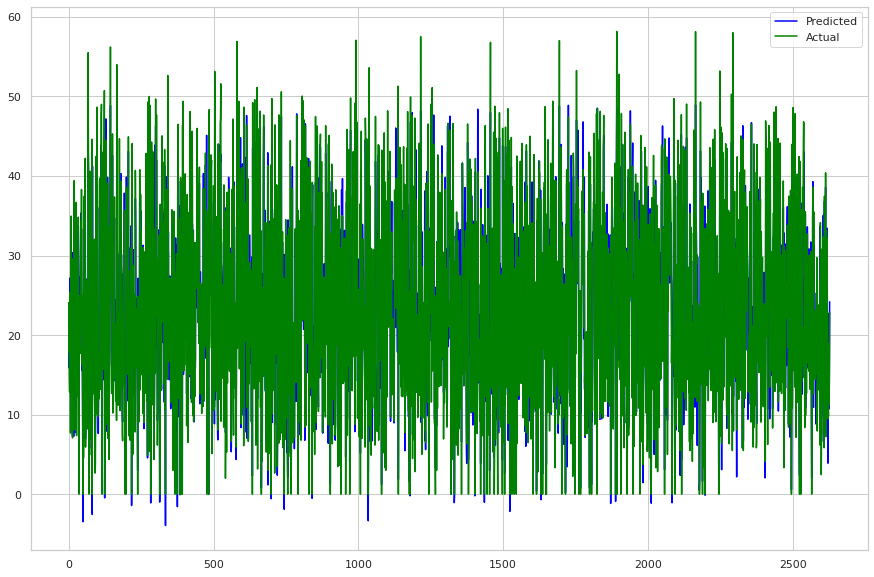

In [106]:
#Plotting the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred, color='blue')
plt.plot(np.array(y_test), color='green')
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0, 'y_predicted')

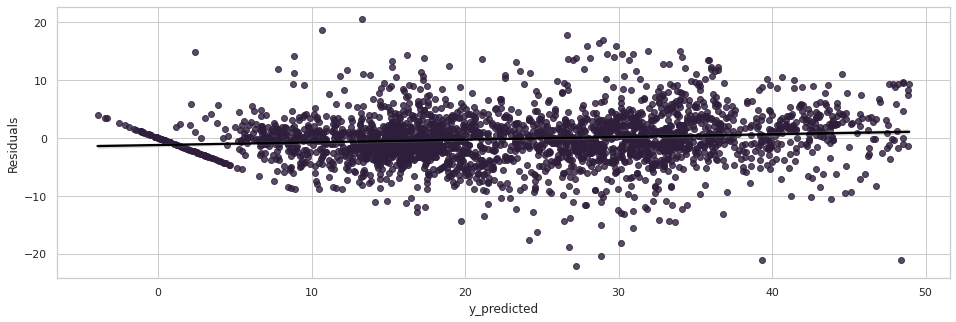

In [107]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'black'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

Text(0.5, 0, 'Relative Importance')

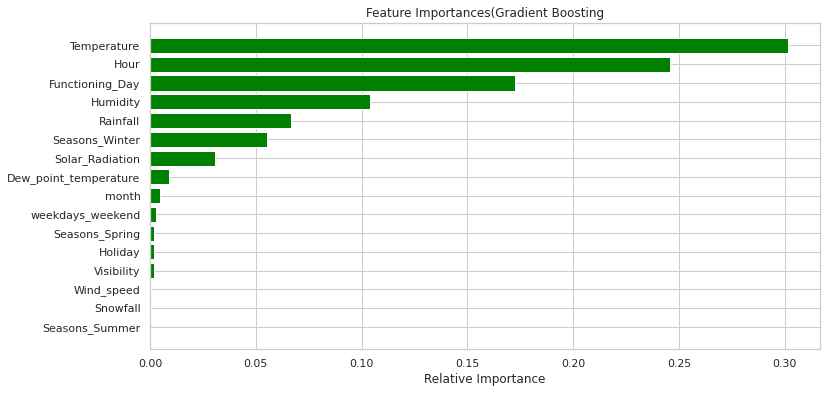

In [108]:
# checking Feature imporatance
imp_variables=X.columns
importances = gradboo_reg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')
     

In [109]:
# Check Final dataframe of All models
final_result=pd.concat([traing_results_df,test_results_df],keys=['Training set','Test set'])
final_result
     

Model     MAE      MSE    RMSE  \
Training set 0                Linear Regression  5.5811  53.3180  7.3019   
             1                            Lasoo  5.6050  53.5147  7.3154   
             2  ElasticNet(GridSearchCV-Tunned)  5.6221  53.7603  7.3321   
             3         Decision Tree Regression  2.7325  15.8058  3.9756   
             4                    Random Forest  0.8871   1.8483  1.3595   
             5     Gardient boosting Regression  2.9529  16.8914  4.1099   
Test set     0                Linear Regression  5.6421  54.0738  7.3535   
             1                            Lasso  5.6610  53.9326  7.3439   
             2  ElasticNet(GridSearchCV-Tunned)  5.6746  54.0945  7.3549   
             3         Decision Tree Regression  3.3646  24.2897  4.9285   
             4                     Radom forest  2.4165  12.9367  3.5968   
             5     Gradient Boosting Regression  3.1681  19.5109  4.4171   

                R2_score  
Training set 0    0.6572  
             1    0.6560  
             2    0.6544  
             3    0.8984  
             4    0.9881  
             5    0.8914  
Test set     0    0.6480  
             1    0.6489  
             2    0.6478  
             3    0.8419  
             4    0.9158  
             5    0.8730

# **Conclusions:**

*   As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
*   Our assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.


     

# **Linear,Lasso and ElasticNet.**

*   From The above data frame, we can see that linear,Lasso and Elastic regression models have almost similar R2 scores(61%) on both training and test data.




# **Decision Tree Regressor:**

*   On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data it was very less. Thus our model memorised the data.So it was a overfitted model.

*   After hyperparameter tuning we got r2 score as 88% on training data and 83% on test data which is quite good for us.






# **Random Forest:**

*   
On Random Forest regressor model, without hyperparameter tuning we got r2 score as 98% on training data and 90% on test data. Thus our model memorised the data.So it was a overfitted model, as per our assumption

*   After hyperparameter tuning we got r2 score as 90% on training data and 87% on test data which is very good for us.






# **Gradient Boosting Regression:**

*   On Random Forest regressor model, without hyperparameter tuning we got r2 score as 86% on training data and 85% on test data.Our model performed well without hyperparameter tuning.
*   After hyperparameter tuning we got r2 score as 96% on training data and 91% on test data,thus we improved the model performance by hyperparameter tuning.


